In [202]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import pandas as pd
import datetime as dt

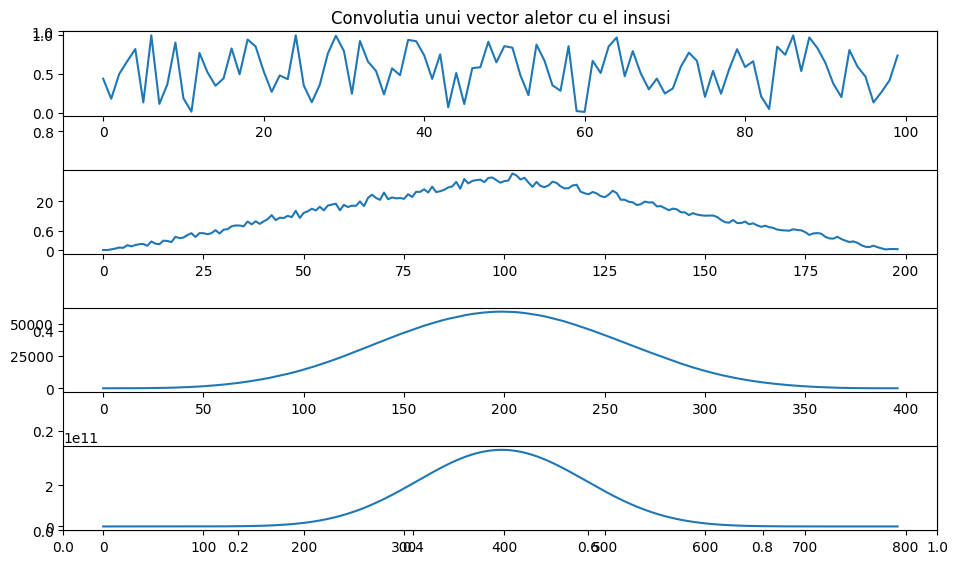

In [203]:
# 1. Generati un vector x[n] aleator de dimensiune N = 100. Calculati iteratia
# x ← x ∗ x de trei ori. Afisati cele patru grafice.

x = np.random.rand(100)
plt.figure(figsize=(10, 6))
plt.title("Convolutia unui vector aletor cu el insusi")
plt.subplot(4,1,1)
plt.plot(x)
for i in range(3):
    x = np.convolve(x,x)
    plt.subplot(4,1,i+2)
    plt.plot(x)
plt.tight_layout()
plt.savefig("grafice/1.pdf", format="pdf")
plt.savefig("grafice/1.png", format="png")

In [204]:
# 2. Vi se dau doua polinoame p(x) s, i q(x) cu grad maxim N generate aleator
# cu coeficienti intregi. Calculati produsul lor r(x) = p(x)q(x) folosing
# convolutia: folosind inmultirea polinoamelor directa si apoi folosind fft.
gradn = 3

p = np.random.randint(low = 1, high = 10, size = gradn + 1)
q = np.random.randint(low = 1, high = 10, size = gradn + 1)
print('Inmultirea directa')
# print(p)
# print(q)
pq = np.convolve(p,q)
print(pq)
print('Inmultirea folosind fft')
p = np.append(p,np.zeros(gradn))
q = np.append(q,np.zeros(gradn)) 
# print(p)
# print(q)
p_f = fft.fft(p)
q_f = fft.fft(q)
pq_f = (np.real(fft.ifft(p_f * q_f))).astype(int)
print(pq_f)   

print("Polinom prin inmultire : ")
for i,coef in enumerate(pq):
    if i == len(pq)-1:
        print (f" {coef} * x^{i}")
    else: 
        print (f" {coef} * x^{i} +",end = "")
        
print("Polinom prin fft : ")
for i,coef in enumerate(pq_f):
    if i == len(pq_f)-1:
        print (f" {coef} * x^{i}")
    else: 
        print (f" {coef} * x^{i} +",end = "")        
    

Inmultirea directa
[ 5 24 34 88 80 80 64]
Inmultirea folosind fft
[ 5 24 34 88 80 80 64]
Polinom prin inmultire : 
 5 * x^0 + 24 * x^1 + 34 * x^2 + 88 * x^3 + 80 * x^4 + 80 * x^5 + 64 * x^6
Polinom prin fft : 
 5 * x^0 + 24 * x^1 + 34 * x^2 + 88 * x^3 + 80 * x^4 + 80 * x^5 + 64 * x^6


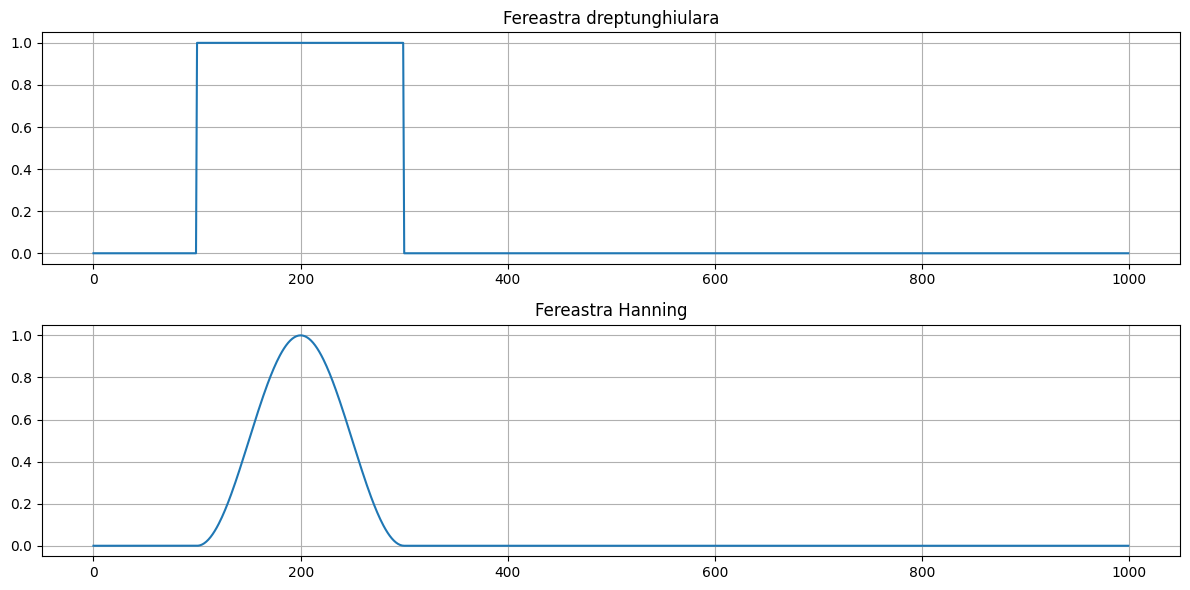

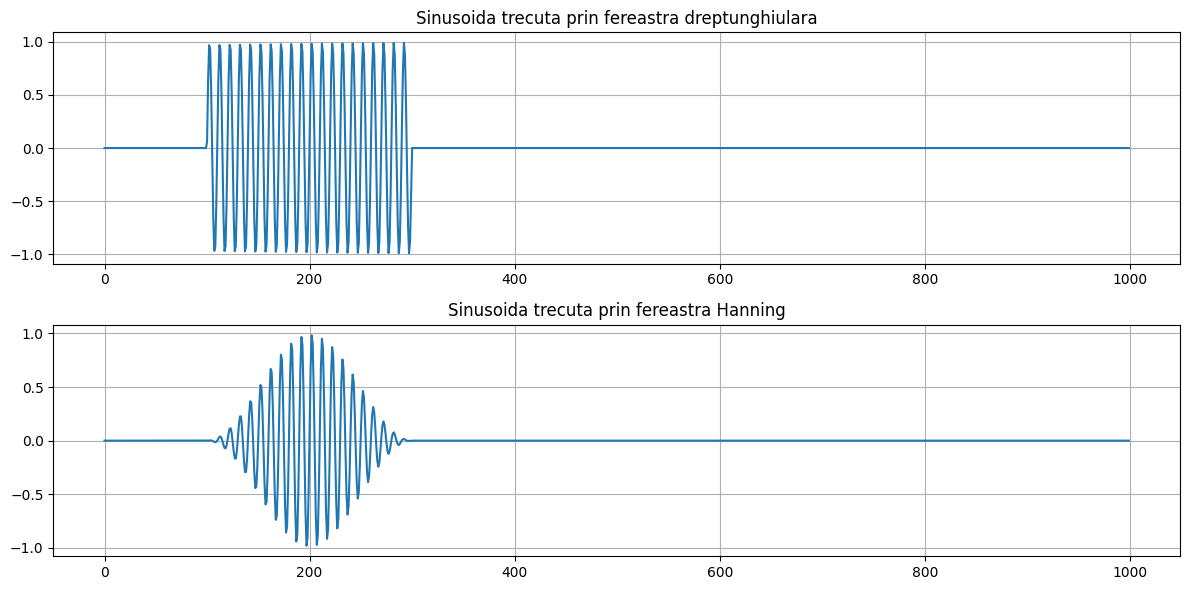

In [205]:
def fereastra_dreptunghiulara(dimensiune):
    f_dreptunghiulara = np.ones(dimensiune)
    return f_dreptunghiulara
    
def fereastra_Hanning(dimensiune):
    n =  np.arange(0,dimensiune,1)
    f_Hanning = 0.5 * (1- np.cos(2*np.pi*n/dimensiune))
    return f_Hanning
    

fs = 1000
f = 100
A = 1
t = np.linspace(0, 1, fs)
sinusoida = A*np.sin(2*np.pi*f*t)

dimensiune =  200

f_d = fereastra_dreptunghiulara(dimensiune)
f_d = np.concatenate((np.zeros(100), f_d, np.zeros(700)))
f_H = fereastra_Hanning(dimensiune)
f_H = np.concatenate((np.zeros(100), f_H, np.zeros(700)))

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title("Fereastra dreptunghiulara")
plt.plot(f_d)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Fereastra Hanning")
plt.plot(f_H)
plt.grid(True)
plt.tight_layout()
plt.savefig("grafice/3_a.pdf", format="pdf")
plt.savefig("grafice/3_a.png", format="png")
plt.show()


plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title("Sinusoida trecuta prin fereastra dreptunghiulara")
plt.plot(f_d * sinusoida)
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Sinusoida trecuta prin fereastra Hanning")
plt.plot(f_H * sinusoida)
plt.grid(True)
plt.tight_layout()
plt.savefig("grafice/3_b.pdf", format="pdf")
plt.savefig("grafice/3_b.png", format="png")

In [206]:
x = pd.read_csv('Train.csv')
time = x['Datetime']

first = dt.datetime.strptime(time[0],'%d-%m-%Y %H:%M')
last = dt.datetime.strptime(time[len(time)-1],'%d-%m-%Y %H:%M')
# Hz =  s^(-1)
# 1 zi = 24 * 3600 s
zi_in_secunde =  24 * 3600 
time_interval =  ((last - first).days + 1) * zi_in_secunde
frecv_esantionare = len(x['Count'])/time_interval


start = 24 * 6
l = 24 * 3
final =  start + l
times = np.array(x['Datetime'][start:final+1])
times = pd.to_datetime(times, format='%d-%m-%Y %H:%M')
samples = np.array(x['Count'][start:final+1])
# print(time_interval)
print(F"Frecventa in hz {frecv_esantionare}")

Frecventa in hz 0.0002777777777777778


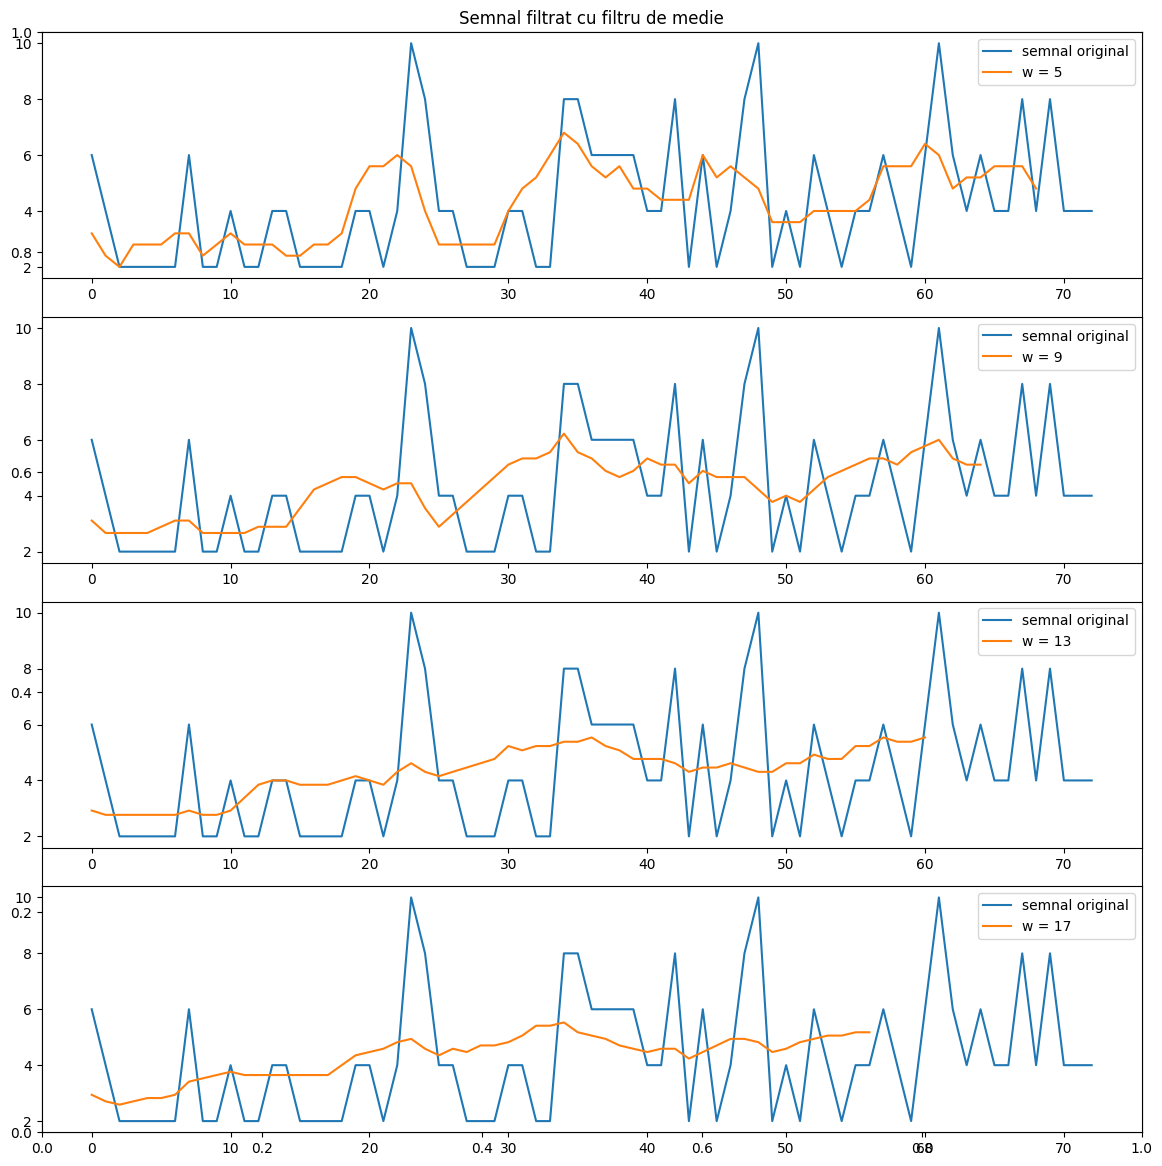

In [207]:
samples = np.array(samples)
plt.figure(figsize=(12,12))
plt.title("Semnal filtrat cu filtru de medie")
w_s =[ 5,9,13,17]
subp = len(w_s)
for i,w in enumerate(w_s):
    plt.subplot(subp,1,i+1)
    plt.plot(samples, label = "semnal original" )
    f = np.convolve(samples, np.ones(w), 'valid') / w
    plt.plot(f, label = f"w = {w}")
    plt.legend()
 
plt.tight_layout()   
plt.savefig("grafice/4_b.pdf", format="pdf")
plt.savefig("grafice/4_b.png", format="png")

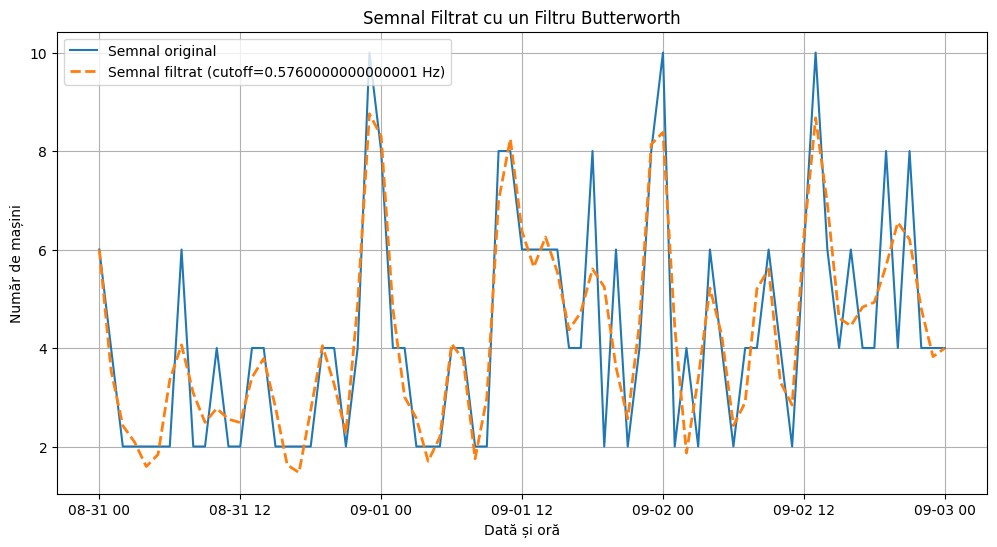

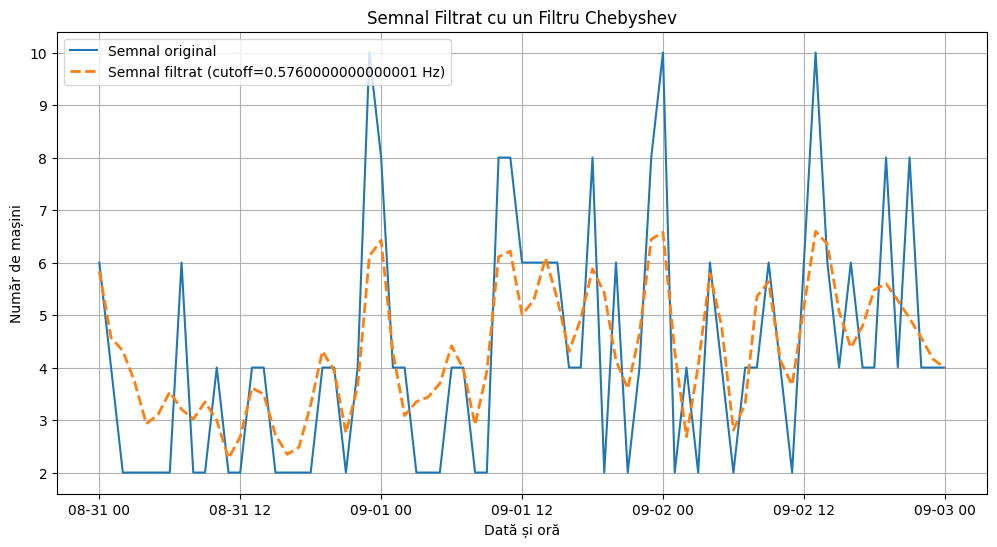

In [208]:
from scipy.signal import butter,cheby1, filtfilt

frecv_N = frecv_esantionare/2
frecv_taiere = 0.00008
# frecvența de tăiere
frecv_taiere_normalizata = frecv_taiere/frecv_N

# creez filtru 
b, a = butter(5, frecv_taiere_normalizata, btype='low', analog=False)
bc, ac = cheby1(5, 5, frecv_taiere_normalizata, btype='low', analog=False)

# aplic filtru folosind filtfilt
samp = samples
filtered_signal_b = filtfilt(b, a, samp)

samp = samples
filtered_signal_f = filtfilt(bc, ac, samp)


plt.figure(figsize=(12, 6))
plt.plot(times, samp, label='Semnal original')
plt.plot(times, filtered_signal_b, label=f'Semnal filtrat (cutoff={cutoff_frequency} Hz)', linestyle='--', linewidth=2)
plt.title('Semnal Filtrat cu un Filtru Butterworth')
plt.xlabel('Dată și oră')
plt.ylabel('Număr de mașini')
plt.legend()
plt.grid(True)
plt.savefig("grafice/4_d_1.pdf", format="pdf")
plt.savefig("grafice/4_d_1.png", format="png")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(times, samp, label='Semnal original')
plt.plot(times, filtered_signal_f, label=f'Semnal filtrat (cutoff={cutoff_frequency} Hz)', linestyle='--', linewidth=2)
plt.title('Semnal Filtrat cu un Filtru Chebyshev')
plt.xlabel('Dată și oră')
plt.ylabel('Număr de mașini')
plt.legend()
plt.grid(True)
plt.savefig("grafice/4_d_2.pdf", format="pdf")
plt.savefig("grafice/4_d_2.png", format="png")
plt.show()

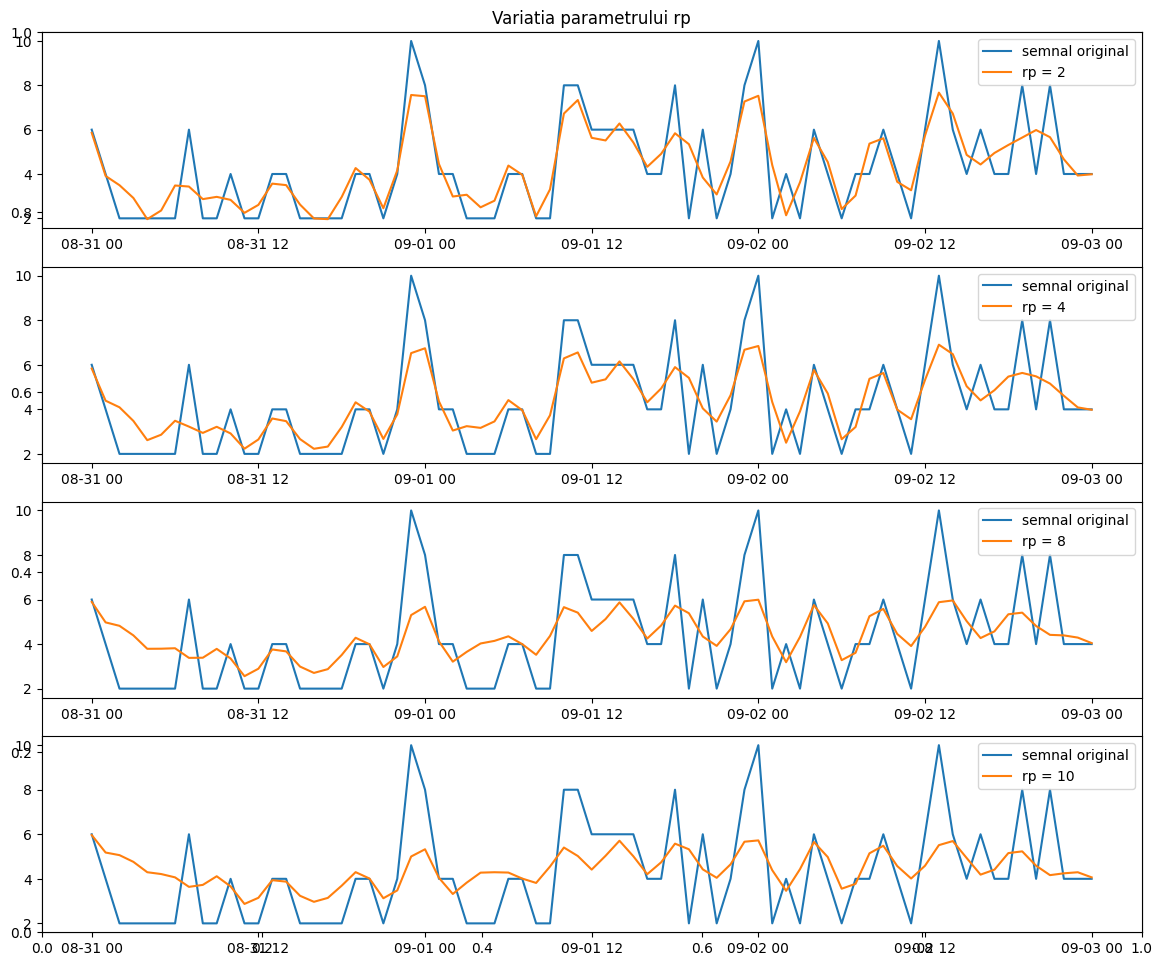

In [209]:
# aplicat pe mai multe rp
rp = [2,4,8, 10]
n = len(rp)
plt.figure(figsize=(12,10))
plt.title("Variatia parametrului rp")
for i,r in enumerate(rp):
    b, a = cheby1(5, r, frecv_taiere_normalizata, btype='low', analog=False)

 
    samp = samples
    filtered_signal = filtfilt(b, a, samp)
    plt.subplot(n,1,i+1)
    plt.plot(times, samples, label = "semnal original")
    plt.plot(times, filtered_signal, label =  f"rp = {r}")
    plt.legend()
    

plt.tight_layout()
plt.savefig("grafice/4_d_3.pdf", format="pdf")
plt.savefig("grafice/4_d_3.png", format="png")
plt.show()

In [210]:
# As alege filtrul Cebyshev deoarece nu afecteaza 
# componentele de frecventa din semnal

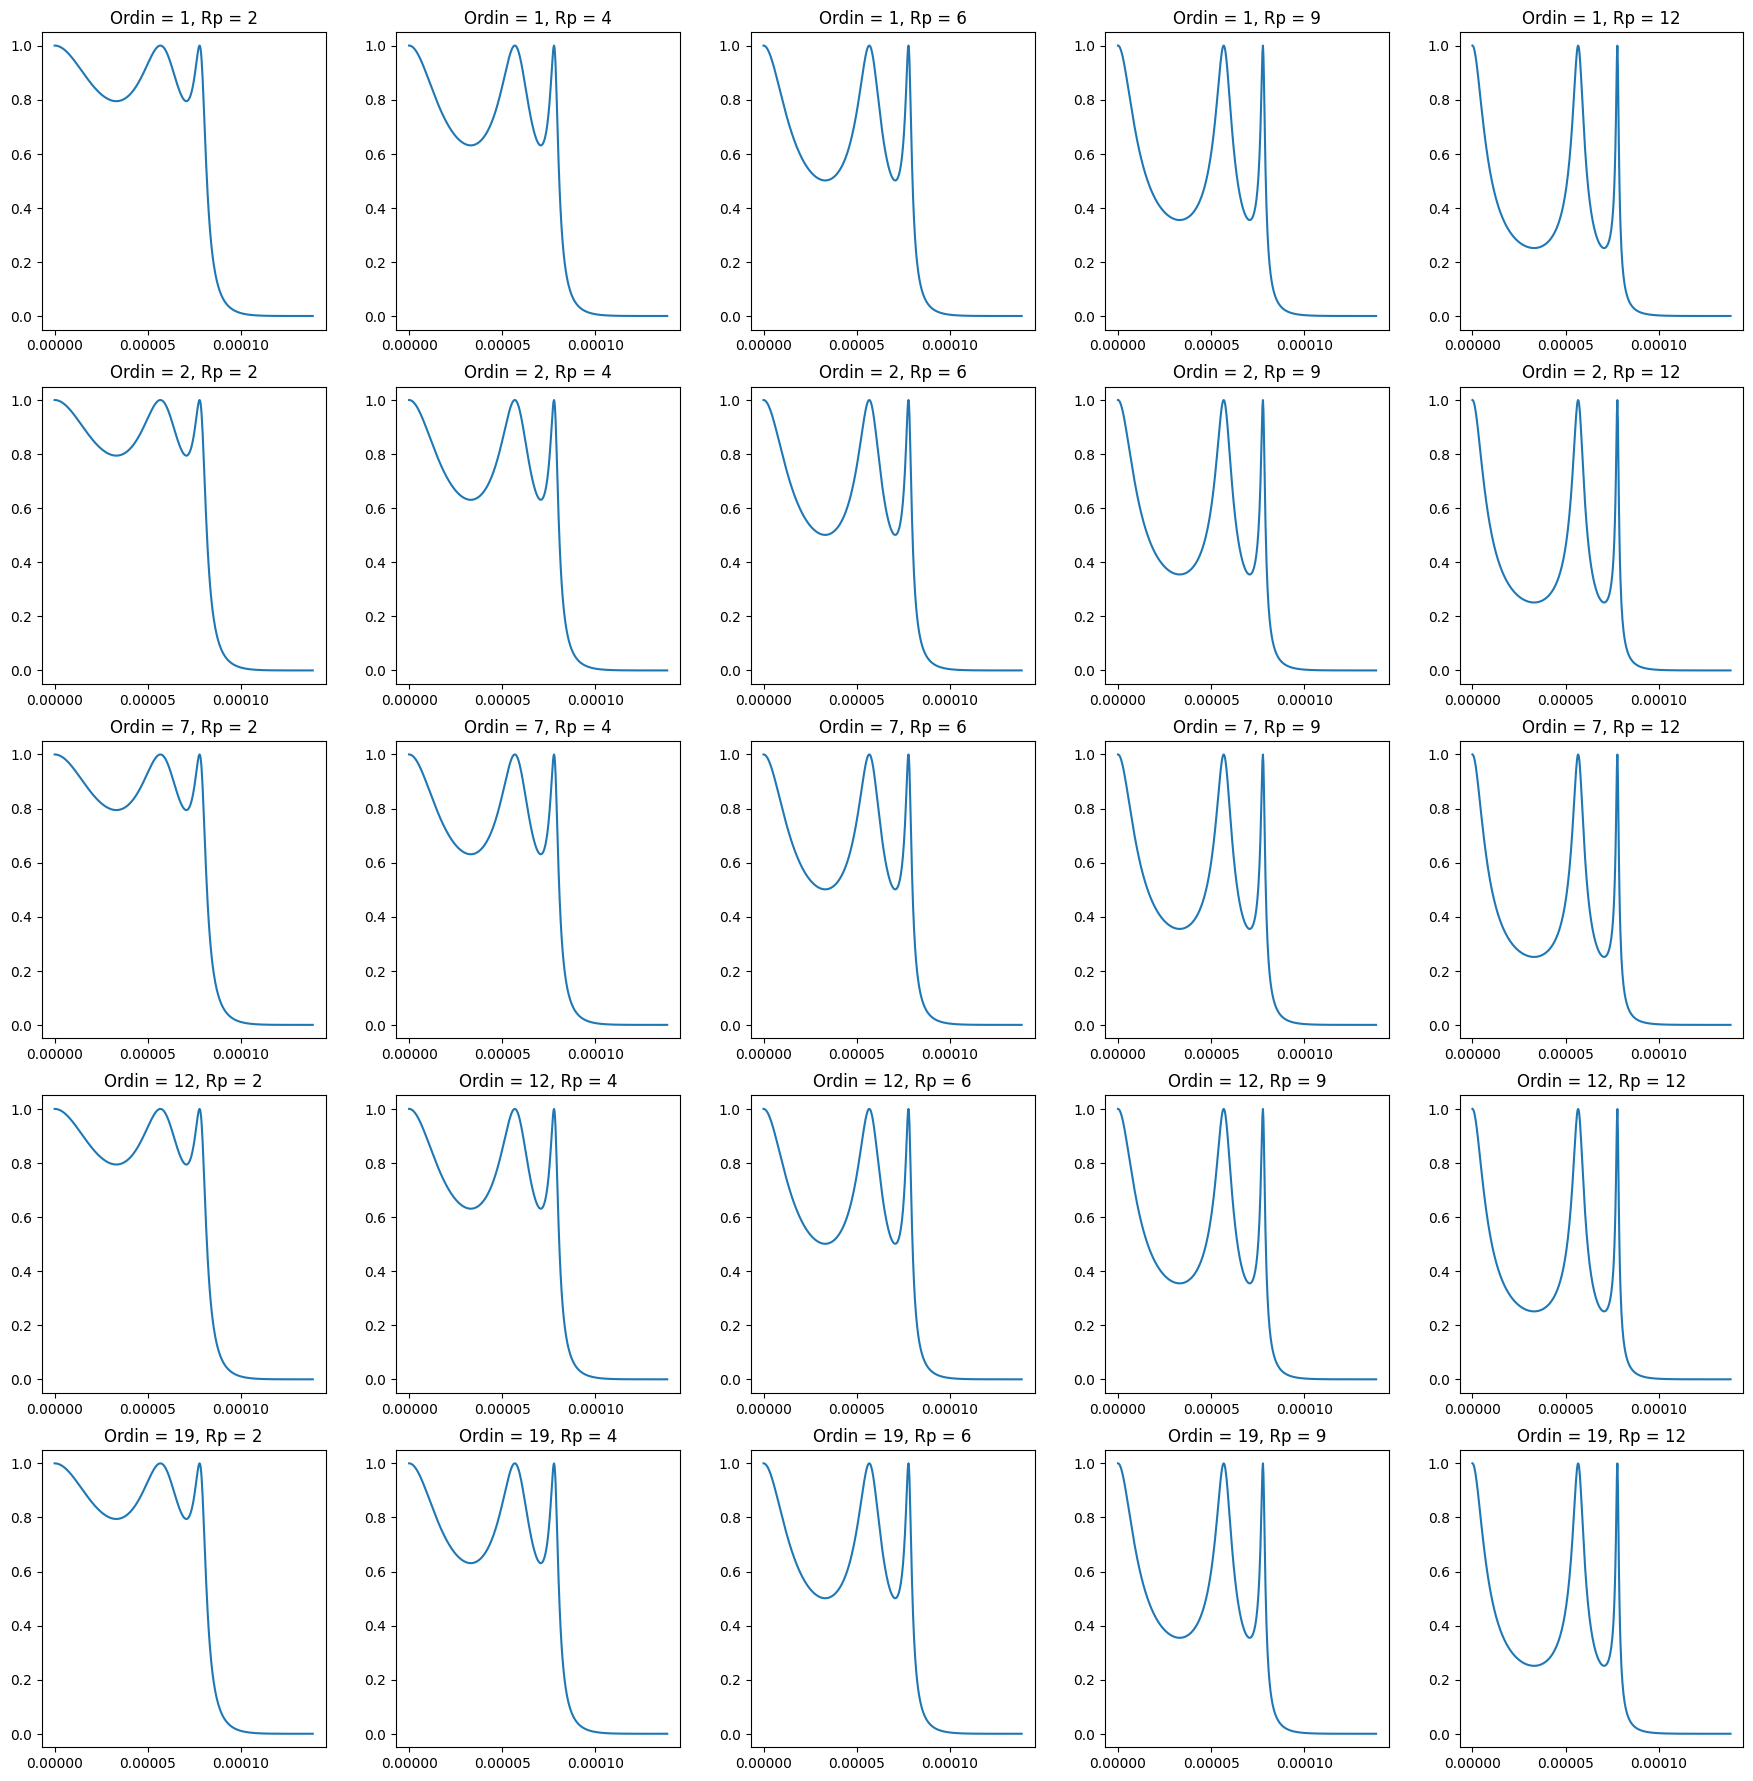

In [211]:
from scipy.signal import freqz
# returneaza un vector w cu frecventele pentru
# care este calculat raspunsul si un vector h de numere complexe, 
# reprezentand raspunsul in frecventa.
ordin = [1, 2, 7, 12, 19]
rp = [2, 4 ,6, 9, 12]
fig, axs = plt.subplots(len(ordin), len(rp), figsize=(18,18))
fig.tight_layout(pad = 2)
for i,o in enumerate(ordin):
    for j,r in enumerate(rp):
        b, a = cheby1(5, r, frecv_taiere_normalizata, btype='low', analog=False)
        w, h = freqz(b,a, fs = frecv_esantionare)              
        axs[i,j].set_title(f"Ordin = {o}, Rp = {r}")
        axs[i,j].plot(w, abs(h))
        
plt.savefig("grafice/4_f.pdf", format="pdf")
plt.savefig("grafice/4_f.png", format="png")       